# Data Covid Indonesia 

In [22]:
# mengakses API covid19.go.id
import requests

resp = requests.get('https://data.covid19.go.id/public/api/update.json')

# mengevaluasi respon
# 200, permintaan dipenuhi
# 404, berkas yang diminta tidak ditemukan
# 500, akses permintaan ditolak
# 501, terjadi kesalahan pada server
print(resp)

<Response [200]>


In [23]:
# mengetahui meta data apa saja yang tersimpan
print(resp.headers)

{'Server': 'nginx', 'Date': 'Fri, 16 Jul 2021 12:42:10 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Fri, 16 Jul 2021 12:41:55 GMT', 'ETag': 'W/"60f17e93-2f573"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [24]:
# mengekstrak isi respon

cov_id_raw = resp.json()

# print(cov_id_raw)

In [25]:
# mengekstrak isi respon 2

print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']
print(cov_id_update.keys())
#print(cov_id_update['penambahan'])
#print(cov_id_update['harian'])
print(cov_id_update['total'])


Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).
dict_keys(['penambahan', 'harian', 'total'])
{'jumlah_positif': 2780803, 'jumlah_dirawat': 504915, 'jumlah_sembuh': 2204491, 'jumlah_meninggal': 71397}


In [26]:
# Analisa Data
print('Tanggal pembaharuan data penambahan kasus: ', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh: ', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal: ', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini: ', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini: ', cov_id_update['total']['jumlah_meninggal'] )


Tanggal pembaharuan data penambahan kasus:  2021-07-16
Jumlah penambahan kasus sembuh:  28079
Jumlah penambahan kasus meninggal:  1205
Jumlah total kasus positif hingga saat ini:  2780803
Jumlah total kasus meninggal hingga saat ini:  71397


# Memfokuskan Data Covid di Jawa Barat

In [1]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [2]:
# Mengetahui nama-nama elemen utama yang tersedia

print('Nama-nama elemen utama :\n' , cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat :%d' %cov_jabar_raw['kasus_total'])
print('Presentase kematian akibat COVID-19 di Jawa Barat :%f.2%% ' % cov_jabar_raw['meninggal_persen'] )
print('Presentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama :
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat :488689
Presentase kematian akibat COVID-19 di Jawa Barat :1.438543.2% 
Presentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 76.842941.2%


In [3]:
# Memperoleh Informasi Lebih Lengkap

import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar: \n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       501 non-null    int64
 1   KASUS                         501 non-null    int64
 2   MENINGGAL                     501 non-null    int64
 3   SEMBUH                        501 non-null    int64
 4   DIRAWAT_OR_ISOLASI            501 non-null    int64
 5   AKUMULASI_KASUS               501 non-null    int64
 6   AKUMULASI_SEMBUH              501 non-null    int64
 7   AKUMULASI_MENINGGAL           501 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  501 non-null    int64
dtypes: int64(9)
memory usage: 35.4 KB
Info cov_jabar: 
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583107200000      3          0       0                   3   
1  1583193600000      1          1       0  

In [4]:
# Melakukan pembersihan data

cov_jabar_tidy = (cov_jabar.drop(columns = [item for item in cov_jabar.columns
                                                                   if item.startswith('AKUMULASI')
                                                                       or item.startswith('DIRAWAT')])
                                            .rename(columns = str.lower)
                                            .rename(columns = {'kasus': 'kasus_baru'})
                 )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit = 'ns')
print('Lima data teratas: \n', cov_jabar_tidy.head())

Lima data teratas: 
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


<Figure size 432x288 with 0 Axes>

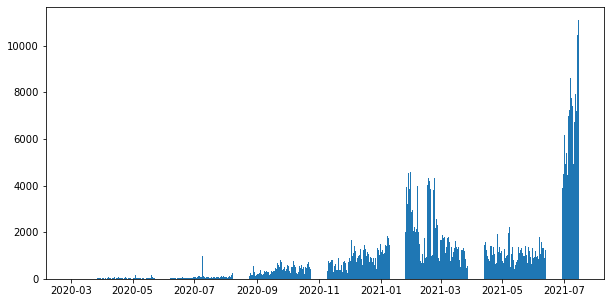

In [21]:
# Menggunakan Grafik untuk visualisasi data agar lebih mudah dimengerti

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data = cov_jabar_tidy, x = 'tanggal' , height = 'kasus_baru')
plt.show()




<Figure size 432x288 with 0 Axes>

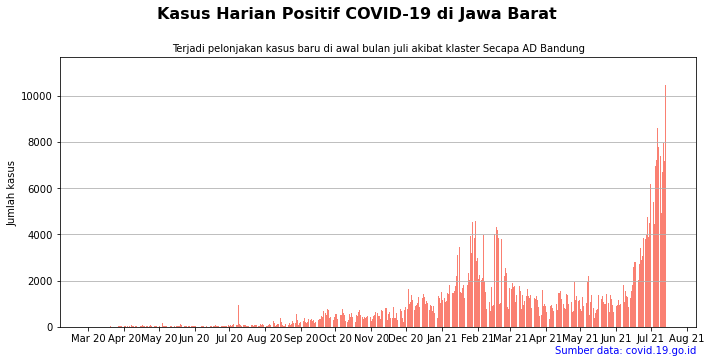

In [5]:
# Memberikan keterangan pada grafik

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data = cov_jabar_tidy, x = 'tanggal', height = 'kasus_baru', color = 'salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat',
            y = 1.00, fontsize = 16, fontweight = 'bold', ha = 'center')
ax.set_title('Terjadi pelonjakan kasus baru di awal bulan juli akibat klaster Secapa AD Bandung',
            fontsize = 10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1,  -0.1, 'Sumber data: covid.19.go.id',
        color = 'blue', ha = 'right', transform = ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()




<Figure size 432x288 with 0 Axes>

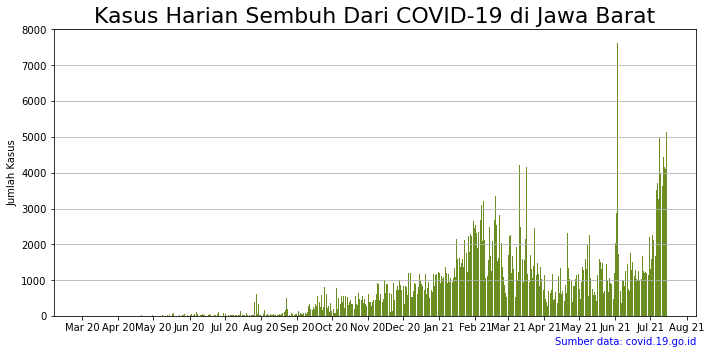

In [6]:
#Grafik untuk kasus sembuh

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data = cov_jabar_tidy, x = 'tanggal', height = 'sembuh', color = 'olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
            fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator(''))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

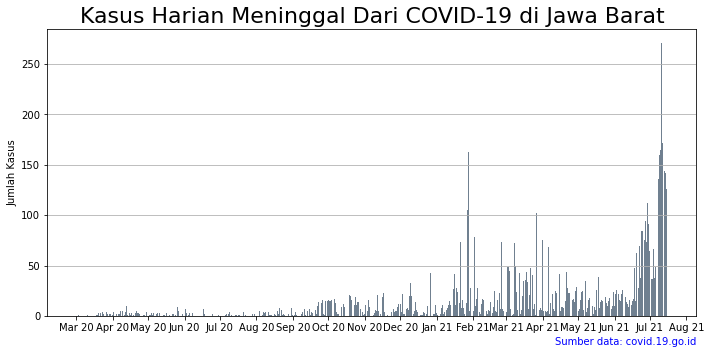

In [7]:
# Grafik Kasus Meninggal

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data = cov_jabar_tidy, x = 'tanggal', height = 'meninggal', color = 'slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
            fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator(''))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [8]:
cov_jabar_tidy.tail()


,tanggal,kasus_baru,meninggal,sembuh
496,2021-07-11,6704,271,3619
497,2021-07-12,7942,171,4450
498,2021-07-13,7192,144,4166
499,2021-07-14,10444,142,4119
500,2021-07-15,11101,126,5137


In [9]:
# Grafik per pekan --mengamati grafik lebih dalam

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                    .resample('W')
                    .sum()
                    .reset_index()
                    .rename(columns = {'kasus_baru' : 'jumlah'}))

cov_jabar_pekanan

,tanggal,jumlah
0,2020-03-08,7
1,2020-03-15,5
2,2020-03-22,52
3,2020-03-29,104
4,2020-04-05,131
...,...,...
67,2021-06-20,15628
68,2021-06-27,23735
69,2021-07-04,34102
70,2021-07-11,49603


In [10]:
# Menambahkan kolom 'tahun' dan 'pekan ke'

cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x : x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan [['tahun', 'pekan ke', 'jumlah']]


print('Info cov_jabar_pekanan: ')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n' , cov_jabar_pekanan.head())



Info cov_jabar_pekanan: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     72 non-null     int64
 1   pekan ke  72 non-null     int64
 2   jumlah    72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan ke  jumlah
0   2020        10       7
1   2020        11       5
2   2020        12      52
3   2020        13     104
4   2020        14     131


In [11]:
# Membuat tambahan kolom agar lebih mudah membandingkan jumlah pekan ini dan pekan sebelumnya

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)

cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh teratas:\n', cov_jabar_pekanan.tail(10))



Sepuluh teratas:
     tahun  pekan ke  jumlah  jumlah_pekanlalu  lebih_baik
62   2021        19    5782              8891        True
63   2021        20    8083              5782       False
64   2021        21    7247              8083        True
65   2021        22    7129              7247        True
66   2021        23    9180              7129       False
67   2021        24   15628              9180       False
68   2021        25   23735             15628       False
69   2021        26   34102             23735       False
70   2021        27   49603             34102       False
71   2021        28   36679             49603        True


<Figure size 432x288 with 0 Axes>

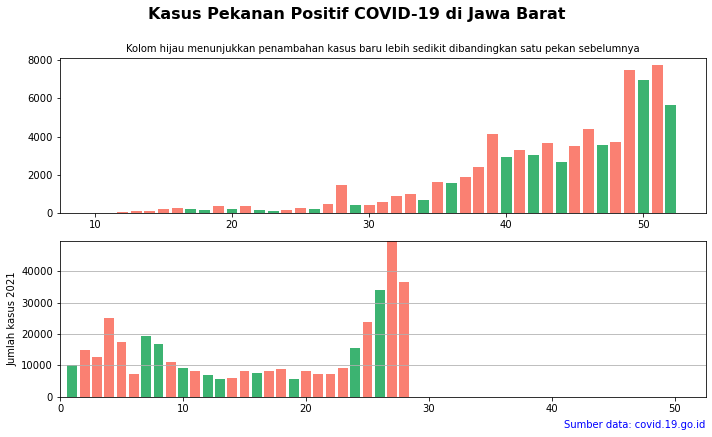

In [12]:
# Membuat Bar chart informasi data "Apakah pekan ini lebih baik dari pekan sebelumnnya"

import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows = jml_tahun_terjadi_covid19,
                        figsize = (10, 3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
            y = 1.00, fontsize = 16, fontweight = 'bold', ha = 'center')
for i, ax in enumerate(axes):
    ax.bar(data = cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun'] == tahun_terjadi_covid19[i]],
          x = 'pekan ke', height = 'jumlah',
          color = ['mediumseagreen' if x is True else 'salmon'
                  for x in cov_jabar_pekanan['lebih_baik']])

    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize = 10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)
        
        ax.set_xlim([0, 52.5])
        ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
        ax.set_xlabel('')
        ax.set_ylabel('Jumlah kasus %d' % (tahun_terjadi_covid19[i],))
        ax.grid(axis = 'y')
        

plt.tight_layout()
plt.show()

In [13]:
# Melihat kasus aktif

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
496 2021-07-11            89361            356204                 6445
497 2021-07-12            92682            360654                 6616
498 2021-07-13            95564            364820                 6760
499 2021-07-14           101747            368939                 6902
500 2021-07-15           107585            374076                 7028


<ipython-input-9-91e7d892dfe2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)


<Figure size 432x288 with 0 Axes>

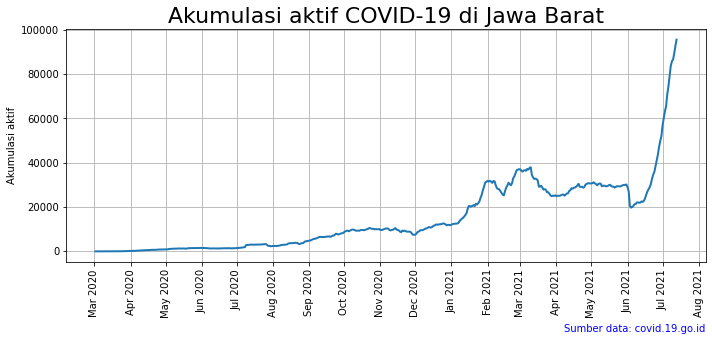

In [9]:
# Membuat Line Chart Pola Kasus Aktif

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot('tanggal', 'akumulasi_aktif', data = cov_jabar_akumulasi, lw = 2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat', fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color = 'blue', ha = 'right', transform = ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()



<Figure size 432x288 with 0 Axes>

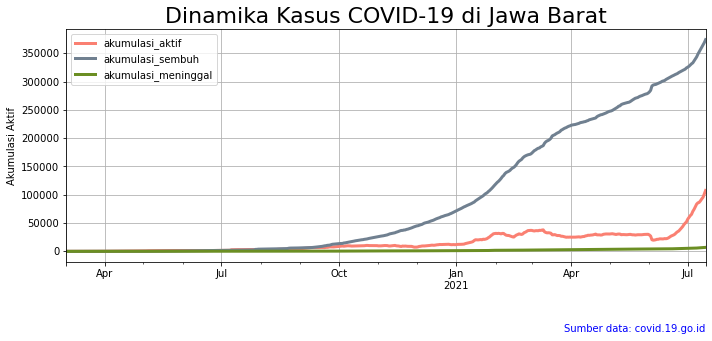

In [15]:
# Grafik Dinamika Kasus Covid-19 di Jawa Barat

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

plt.clf()
fig, ax = plt.subplots(figsize = (10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind = 'line', ax = ax, lw = 3,
                           color =['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', fontsize = 22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1 , -0.3, 'Sumber data: covid.19.go.id', color = 'blue',
       ha = 'right', transform = ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()
